<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground-018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
!pip install japanize-matplotlib | tail -n 1
!pip install plotly | tail -n 1

cuda:0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


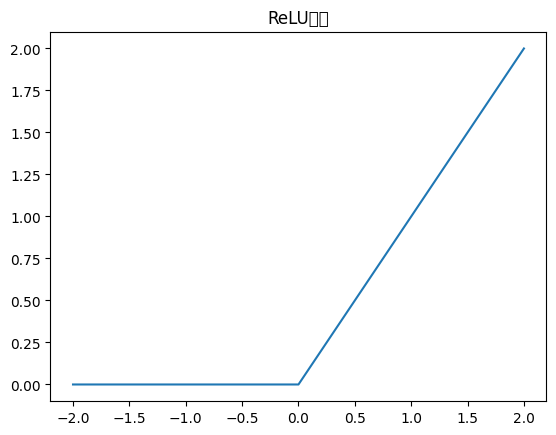

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Nov 29 06:26 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Nov 29 06:26 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Nov 29 06:26 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Nov 29 06:26 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Nov 29 06:26 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Nov 29 06:26 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Nov 29 06:26 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Nov 29 06:26 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Nov 29 06:26 train-labels-idx1-ubyte.gz
train_set0.data.shape： torch.Size([60000, 28, 28])
データ件数： 60000
入力データの型： <class 'PIL.Image.Image'>
正解データの型： <class 'int'>
image.format:None
image.size:(28, 28)
image.mode:L
image.getextrema:(0, 255)


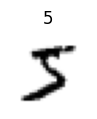

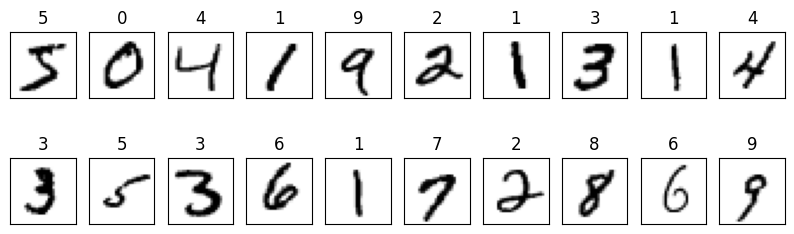

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

# relu = torch.nn.ReLU()
# x_np = np.arange(-2, 2.1, 0.25)
# x = torch.tensor(x_np).float()
# y = relu(x)

# plt.plot(x.data, y.data)
# plt.title('ReLU関数')
# plt.show()

# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# # テスト用テンソル変数x, y
# x_np = np.arange(-2, 2.1, 0.25)
# y_np = np.arange(-1, 3.1, 0.25)
# x = torch.tensor(x_np).float()
# y = torch.tensor(y_np).float()

# # 変数xをGPUに送る
# x = x.to(device)
# y = y.to(device)

# # 変数xとyのdevice属性の確認
# print('x:', x.device)
# print('y:', y.device)

# # xとyの間の演算
# z = x * y
# print(z)

# ReLU関数
relu = torch.nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU関数')
plt.show()

# ダウンロード先ディレクトリ名
data_root = './data'
train_set0 = datasets.MNIST(
    # 元データダウンロード先の指定
    root = data_root,
    # 訓練データか検証データか
    train = True,
    # 元データがない場合にダウンロードするか
    download = True)

# ダウンロードしたファイルの確認
!ls -lR ./data/MNIST

# データ件数の確認
print('train_set0.data.shape：', train_set0.data.shape)
print('データ件数：', len(train_set0))

# 最初の要素の取得
image, label = train_set0[0]

# データ型の確認
print('入力データの型：', type(image))
print('正解データの型：', type(label))
print(f'image.format:{image.format}')
print(f'image.size:{image.size}')
print(f'image.mode:{image.mode}')
print(f'image.getextrema:{image.getextrema()}')
# for i in range(image.size[0]):
#   for j in range(image.size[1]):
#     print(f'image.getpixel(({i},{j})):{image.getpixel((i, j))}')

# 入力データの画像表示
plt.figure(figsize=(1, 1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

# 正解データ付きで、最初の２０個をイメージ表示
plt.figure(figsize=(10, 3))
for i in range(20):
  ax = plt.subplot(2, 10, i + 1)

  # imageとlabelの所得
  image, label = train_set0[i]

  # イメージ表示
  plt.imshow(image, cmap='gray_r')
  ax.set_title(f'{label}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
